In [115]:
# Libraries: Standard ones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Library for boxplots
import seaborn as sns


# K-means function
from sklearn.cluster import KMeans

# Functions for silhouette
from sklearn.metrics import silhouette_samples, silhouette_score

# Function to standardize the data 
from sklearn.preprocessing import scale

# Functions for hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [116]:
df_foot = pd.read_csv('footdata.csv')

In [117]:
df_foot.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY',
       'HR', 'AR', 'B365H', 'B365D', 'B365A'],
      dtype='object')

In [118]:
df_HA_win = df_foot.filter(['HomeTeam','AwayTeam','B365H','B365D','B365A','HTR'])
df_HA_win

,HomeTeam,AwayTeam,B365H,B365D,B365A,HTR
0,Bordeaux,Lens,2.20,2.87,3.60,H
1,Caen,Nice,2.40,2.75,3.00,D
2,Lille,Lorient,1.72,3.00,5.00,D
3,Monaco,St Etienne,1.90,2.90,4.00,H
4,Paris SG,Sochaux,1.72,3.40,5.00,D
...,...,...,...,...,...,...
375,Nancy,Rennes,1.65,3.60,5.50,D
376,Nice,Caen,2.05,3.25,3.75,D
377,Sochaux,Paris SG,3.80,3.25,2.00,A
378,St Etienne,Monaco,1.72,3.40,5.25,H


In [119]:
teams = df_foot.HomeTeam.unique()
teams

array(['Bordeaux', 'Caen', 'Lille', 'Monaco', 'Paris SG', 'Rennes',
       'Strasbourg', 'Valenciennes', 'Le Mans', 'Lyon', 'Auxerre',
       'Lorient', 'Marseille', 'Nancy', 'Nice', 'Sochaux', 'St Etienne',
       'Toulouse', 'Lens', 'Metz'], dtype=object)

In [120]:
df_HA_win["BetTeam"] = ''
df_HA_win['BetTeam'] = df_HA_win.iloc[0:][['B365H', 'B365D', 'B365A']].idxmin(axis=1)

In [121]:
df_HA_win['BetTeam'] = df_HA_win['BetTeam'].str.replace(r'B365', '')
df_HA_win

,HomeTeam,AwayTeam,B365H,B365D,B365A,HTR,BetTeam
0,Bordeaux,Lens,2.20,2.87,3.60,H,H
1,Caen,Nice,2.40,2.75,3.00,D,H
2,Lille,Lorient,1.72,3.00,5.00,D,H
3,Monaco,St Etienne,1.90,2.90,4.00,H,H
4,Paris SG,Sochaux,1.72,3.40,5.00,D,H
...,...,...,...,...,...,...,...
375,Nancy,Rennes,1.65,3.60,5.50,D,H
376,Nice,Caen,2.05,3.25,3.75,D,H
377,Sochaux,Paris SG,3.80,3.25,2.00,A,A
378,St Etienne,Monaco,1.72,3.40,5.25,H,H


In [122]:
df_HA_win['ecart_bet'] = ''
df_HA_win['ecart_bet'] = abs(df_HA_win.iloc[0:]['B365H'] - df_HA_win.iloc[0:]['B365A'])
df_HA_win

,HomeTeam,AwayTeam,B365H,B365D,B365A,HTR,BetTeam,ecart_bet
0,Bordeaux,Lens,2.20,2.87,3.60,H,H,1.40
1,Caen,Nice,2.40,2.75,3.00,D,H,0.60
2,Lille,Lorient,1.72,3.00,5.00,D,H,3.28
3,Monaco,St Etienne,1.90,2.90,4.00,H,H,2.10
4,Paris SG,Sochaux,1.72,3.40,5.00,D,H,3.28
...,...,...,...,...,...,...,...,...
375,Nancy,Rennes,1.65,3.60,5.50,D,H,3.85
376,Nice,Caen,2.05,3.25,3.75,D,H,1.70
377,Sochaux,Paris SG,3.80,3.25,2.00,A,A,1.80
378,St Etienne,Monaco,1.72,3.40,5.25,H,H,3.53


## Number of bad prediction bet

In [123]:
df_HA_win['good_bet'] = df_HA_win['HTR'].str.lower() == df_HA_win['BetTeam'].str.lower()

In [124]:
df_HA_win['good_bet'] *= 1

In [125]:
df_HA_win['good_bet'].value_counts()

0    245
1    135
Name: good_bet, dtype: int64

<AxesSubplot:>

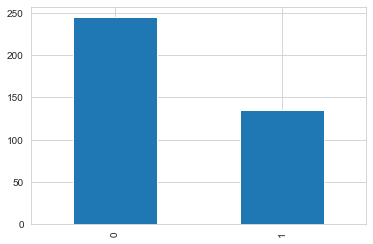

In [126]:
df_HA_win['good_bet'].value_counts().plot(kind='bar')

In [127]:
df_HA_win

,HomeTeam,AwayTeam,B365H,B365D,B365A,HTR,BetTeam,ecart_bet,good_bet
0,Bordeaux,Lens,2.20,2.87,3.60,H,H,1.40,1
1,Caen,Nice,2.40,2.75,3.00,D,H,0.60,0
2,Lille,Lorient,1.72,3.00,5.00,D,H,3.28,0
3,Monaco,St Etienne,1.90,2.90,4.00,H,H,2.10,1
4,Paris SG,Sochaux,1.72,3.40,5.00,D,H,3.28,0
...,...,...,...,...,...,...,...,...,...
375,Nancy,Rennes,1.65,3.60,5.50,D,H,3.85,0
376,Nice,Caen,2.05,3.25,3.75,D,H,1.70,0
377,Sochaux,Paris SG,3.80,3.25,2.00,A,A,1.80,1
378,St Etienne,Monaco,1.72,3.40,5.25,H,H,3.53,1


In [128]:
df_HA_win['bet_interval'] = pd.cut(x=df_HA_win['ecart_bet'], bins=[0,1, 2, 3, 4, 5, 6, 7, 8,9,10,11,12,13,14,15])
df_HA_win

,HomeTeam,AwayTeam,B365H,B365D,B365A,HTR,BetTeam,ecart_bet,good_bet,bet_interval
0,Bordeaux,Lens,2.20,2.87,3.60,H,H,1.40,1,"(1, 2]"
1,Caen,Nice,2.40,2.75,3.00,D,H,0.60,0,"(0, 1]"
2,Lille,Lorient,1.72,3.00,5.00,D,H,3.28,0,"(3, 4]"
3,Monaco,St Etienne,1.90,2.90,4.00,H,H,2.10,1,"(2, 3]"
4,Paris SG,Sochaux,1.72,3.40,5.00,D,H,3.28,0,"(3, 4]"
...,...,...,...,...,...,...,...,...,...,...
375,Nancy,Rennes,1.65,3.60,5.50,D,H,3.85,0,"(3, 4]"
376,Nice,Caen,2.05,3.25,3.75,D,H,1.70,0,"(1, 2]"
377,Sochaux,Paris SG,3.80,3.25,2.00,A,A,1.80,1,"(1, 2]"
378,St Etienne,Monaco,1.72,3.40,5.25,H,H,3.53,1,"(3, 4]"


<AxesSubplot:xlabel='bet_interval'>

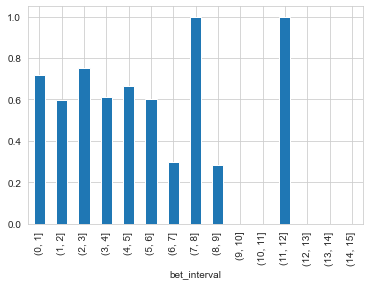

In [129]:
total_bet = df_HA_win.groupby(by=["bet_interval"]).count()
success_bet = df_HA_win.groupby(by=["bet_interval"]).sum()
fail_bet = (total_bet-success_bet)/total_bet
z = 1-z
z['good_bet'].plot(kind='bar')

<AxesSubplot:xlabel='bet_interval'>

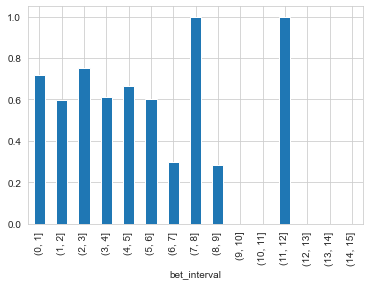

In [130]:
total_bet = df_HA_win.groupby(by=["bet_interval"]).count()
success_bet = df_HA_win.groupby(by=["bet_interval"]).sum()
fail_bet = (total_bet-success_bet)/total_bet
z['good_bet'].plot(kind='bar')

## Valeur moyenne d'ecart de cote avec echec bon prono

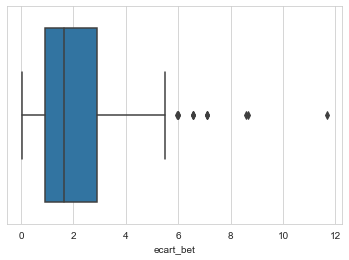

In [131]:
x = df_HA_win[df_HA_win['good_bet']==0]

ax = sns.boxplot(x=x['ecart_bet'])


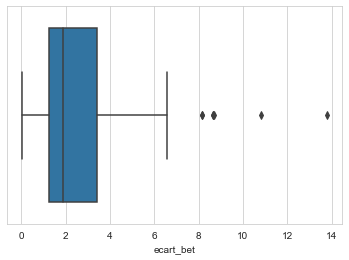

In [132]:
x = df_HA_win[df_HA_win['good_bet']==1]

ax = sns.boxplot(x=x['ecart_bet'])

## Il vaut mieux parier sur quelle équipe ?

In [133]:
#Exemple with Bordeaux Good bet at Home
df_HA_win[(df_HA_win['HomeTeam']=='Bordeaux') &(df_HA_win['good_bet'] ==1) & (df_HA_win['BetTeam']=='H')]

,HomeTeam,AwayTeam,B365H,B365D,B365A,HTR,BetTeam,ecart_bet,good_bet,bet_interval
0,Bordeaux,Lens,2.20,2.87,3.60,H,H,1.40,1,"(1, 2]"
20,Bordeaux,Le Mans,1.66,3.25,5.00,H,H,3.34,1,"(3, 4]"
108,Bordeaux,Valenciennes,1.80,3.25,5.00,H,H,3.20,1,"(3, 4]"
135,Bordeaux,Rennes,2.10,3.10,3.75,H,H,1.65,1,"(1, 2]"
156,Bordeaux,Toulouse,1.72,3.30,5.50,H,H,3.78,1,"(3, 4]"
189,Bordeaux,Auxerre,1.72,3.30,5.50,H,H,3.78,1,"(3, 4]"
229,Bordeaux,Metz,1.36,4.33,9.50,H,H,8.14,1,"(8, 9]"
267,Bordeaux,Paris SG,1.95,3.10,4.33,H,H,2.38,1,"(2, 3]"
288,Bordeaux,Strasbourg,1.53,3.60,7.50,H,H,5.97,1,"(5, 6]"
360,Bordeaux,Sochaux,1.44,4.20,7.50,H,H,6.06,1,"(6, 7]"


In [139]:
teams_winHome_bet1 = pd.DataFrame()
for i in range(0,len(teams)):
    temp = df_HA_win[(df_HA_win['HomeTeam']==teams[i]) & (df_HA_win['good_bet'] ==1) & (df_HA_win['BetTeam']=='H')]
    teams_winHome_bet1 = teams_winHome_bet1.append(temp)
    del temp

In [141]:
teams_winAway_bet1 = pd.DataFrame()
for i in range(0,len(teams)):
    temp = df_HA_win[(df_HA_win['AwayTeam']==teams[i]) & (df_HA_win['BetTeam'] =='A') & (df_HA_win['good_bet'] ==1) ]
    teams_winAway_bet1 = teams_winAway_bet1.append(temp)

In [140]:
teams_winHome_bet1

,HomeTeam,AwayTeam,B365H,B365D,B365A,HTR,BetTeam,ecart_bet,good_bet,bet_interval
0,Bordeaux,Lens,2.20,2.87,3.60,H,H,1.40,1,"(1, 2]"
20,Bordeaux,Le Mans,1.66,3.25,5.00,H,H,3.34,1,"(3, 4]"
108,Bordeaux,Valenciennes,1.80,3.25,5.00,H,H,3.20,1,"(3, 4]"
135,Bordeaux,Rennes,2.10,3.10,3.75,H,H,1.65,1,"(1, 2]"
156,Bordeaux,Toulouse,1.72,3.30,5.50,H,H,3.78,1,"(3, 4]"
...,...,...,...,...,...,...,...,...,...,...
90,Lens,Auxerre,2.10,3.10,3.75,H,H,1.65,1,"(1, 2]"
260,Lens,Toulouse,1.83,3.25,4.75,H,H,2.92,1,"(2, 3]"
311,Lens,Metz,1.50,3.80,8.00,H,H,6.50,1,"(6, 7]"
332,Lens,Sochaux,2.20,3.10,3.50,H,H,1.30,1,"(1, 2]"


In [142]:
teams_winAway_bet1

,HomeTeam,AwayTeam,B365H,B365D,B365A,HTR,BetTeam,ecart_bet,good_bet,bet_interval
203,Metz,Monaco,3.5,3.10,2.20,A,A,1.30,1,"(1, 2]"
291,Caen,Monaco,2.8,2.87,2.75,A,A,0.05,1,"(0, 1]"
377,Sochaux,Paris SG,3.8,3.25,2.00,A,A,1.80,1,"(1, 2]"
224,Metz,Rennes,3.4,3.00,2.30,A,A,1.10,1,"(1, 2]"
244,Metz,Valenciennes,3.0,3.00,2.50,A,A,0.50,1,"(0, 1]"
71,Metz,Lyon,7.5,3.75,1.50,A,A,6.00,1,"(5, 6]"
96,Bordeaux,Lyon,3.2,3.00,2.40,A,A,0.80,1,"(0, 1]"
117,Paris SG,Lyon,3.5,3.10,2.20,A,A,1.30,1,"(1, 2]"
142,Rennes,Lyon,3.5,3.10,2.20,A,A,1.30,1,"(1, 2]"
261,Lille,Lyon,3.1,3.10,2.40,A,A,0.70,1,"(0, 1]"


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


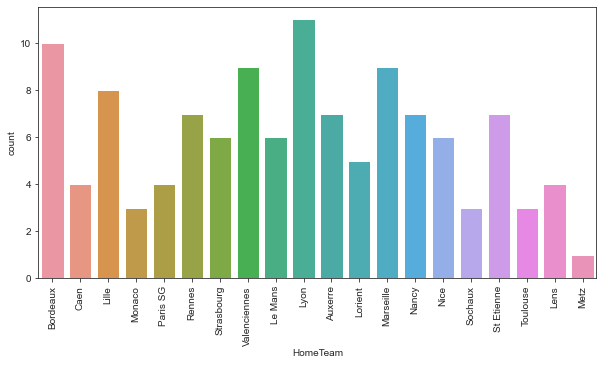

In [156]:
plt.figure(figsize=(10, 5))

ax = sns.countplot(teams_winHome_bet1['HomeTeam'])
plt.setp(ax.get_xticklabels(), rotation=90)[1]

plt.show()



C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


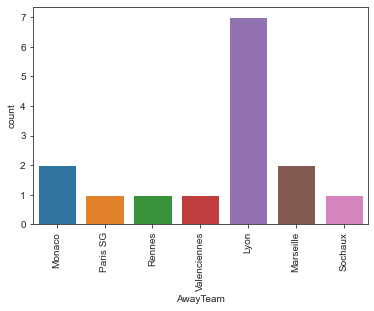

In [157]:

ax = sns.countplot(teams_winAway_bet1['AwayTeam'])
plt.setp(ax.get_xticklabels(), rotation=90)[1]

plt.show()


In [155]:
teams_winAway_bet1['AwayTeam']

203          Monaco
291          Monaco
377        Paris SG
224          Rennes
244    Valenciennes
71             Lyon
96             Lyon
117            Lyon
142            Lyon
261            Lyon
284            Lyon
370            Lyon
39        Marseille
348       Marseille
173         Sochaux
Name: AwayTeam, dtype: object